## Haberman's Cancer Survival - EDA¶

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

 ### About Lymphatic Nodes:

* Lymphatic system tend to cluster around armpits, neck and belly
* Cancer spreads in predictable fashion form breast to lymph glands
* Cancer in lymph nodes - Perhaps single most factor in predicting outcomes
* If cancer is detected in Lymph nodes - Surgery for axillary disection

### Domain Knowledge Note:

* Here, positive axil nodes may not tell anything about survival except for presence of cancer. More positive nodes imply more chances of cancer.



In [7]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

In [8]:
haberman_df = pd.read_csv("haberman.csv")

In [9]:
haberman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Attributes Information

* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

### Data Preparation:


In [10]:
haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


#### Observations on Data Preparation:

* No missing data
* All the datatypes are integers


### High Level Statistics:

In [11]:
haberman_df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Observations

* There is 73% more chances of surviving than dying after 5 years of surgery
* This can Imbalanced Dataset as there are more than 75% survivors(IQR). Is it? We will see.
*There are no null values
*Operation has been performed on diverse age groups
*Most of the operations are performed in 1962 with std-dev 3 years
*We may try to find out medical situation in country that year
*75% of patients have atmost 4 axil nodes
*This can be the reason behind high survival rate of 0.73!
*axil nodes are irregularly distributed. May have outliers; Or most of data is nearer to minimum value as mean is nearer to minimum value.


In [12]:
haberman_df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [13]:
haberman_df['status'].value_counts(normalize = True)

1    0.735294
2    0.264706
Name: status, dtype: float64

#### Observation of High Level Statistics:

* Patients age lies between 30 and 83 with an average of 52 years
* postive lymph nodes observerd as maximum of 52
* Patients got operated at the age between 58 and 69 with an average of 62
* haberman data set is imbalanced, since the data points of status columns is 75 and 25

### Objective of the problem:

* Need to predict whether the patient is going to survie after 5 years of surgery based on the available data i.e, age, year, nodes

### Univariate Analysis 

In [14]:
feature_names = haberman_df.columns

In [15]:
feature_names

Index(['age', 'year', 'nodes', 'status'], dtype='object')

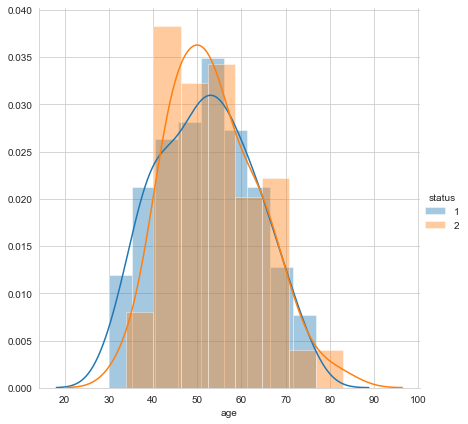

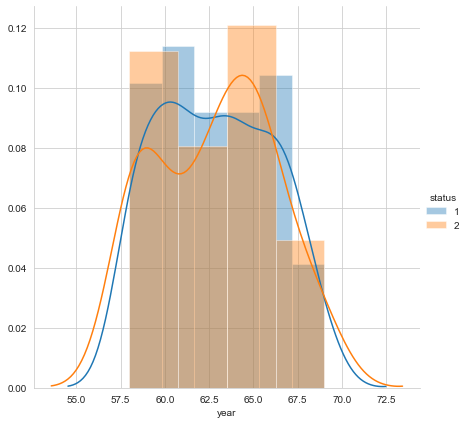

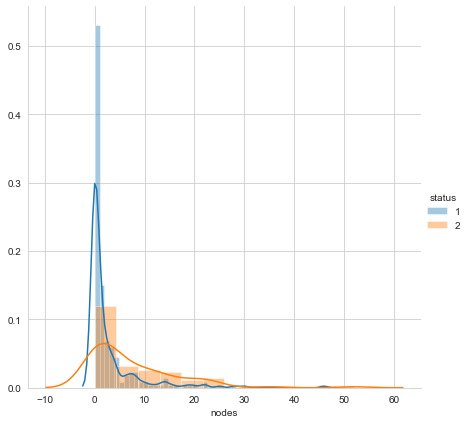

In [16]:
for val in range(len(feature_names[:-1])):
    sns.set_style("whitegrid")
    sns.FacetGrid(haberman_df, hue="status", height=6) \
   .map(sns.distplot, feature_names[val]) \
   .add_legend();
    plt.show();    

#### Observation of Histograms:

After plotting Histogram of age,year and nodes, we found that status 1 and status 2 are overlapping and hence nothing can be concluded from these analysis.


PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
BIN: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


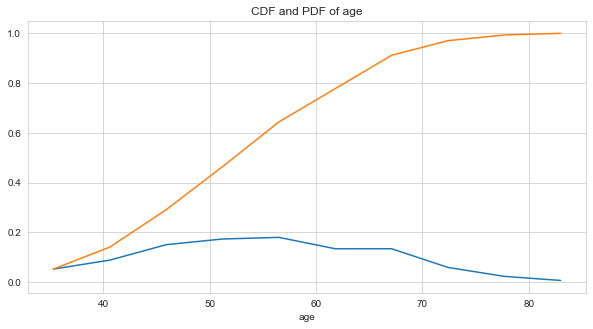





PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
BIN: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


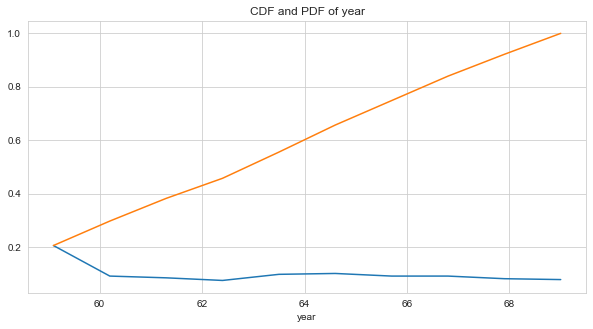





PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
BIN: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


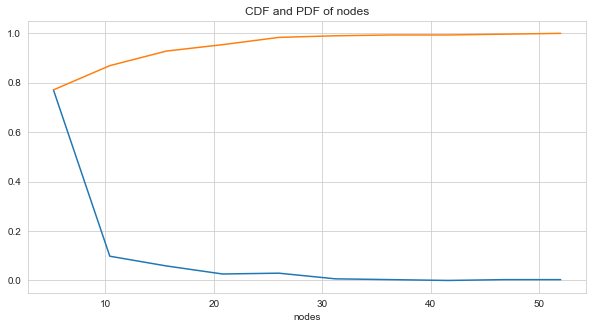

In [17]:
#CDF 

sns.set_style("whitegrid")

for val in feature_names[:-1]:
    plt.figure(figsize=(10,5))
    plt.title("CDF and PDF of {}".format(val))
    counts, bin_edges = np.histogram(haberman_df[val], bins=10, 
                                 density = True)
    pdf = counts/(sum(counts))
    print("PDF: {}".format(pdf))
    print(bin_edges);
    print("BIN: {}".format(bin_edges))

    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))

    plt.plot(bin_edges[1:],pdf);
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(val)
    plt.show();
    print("\n")
    print("\n")


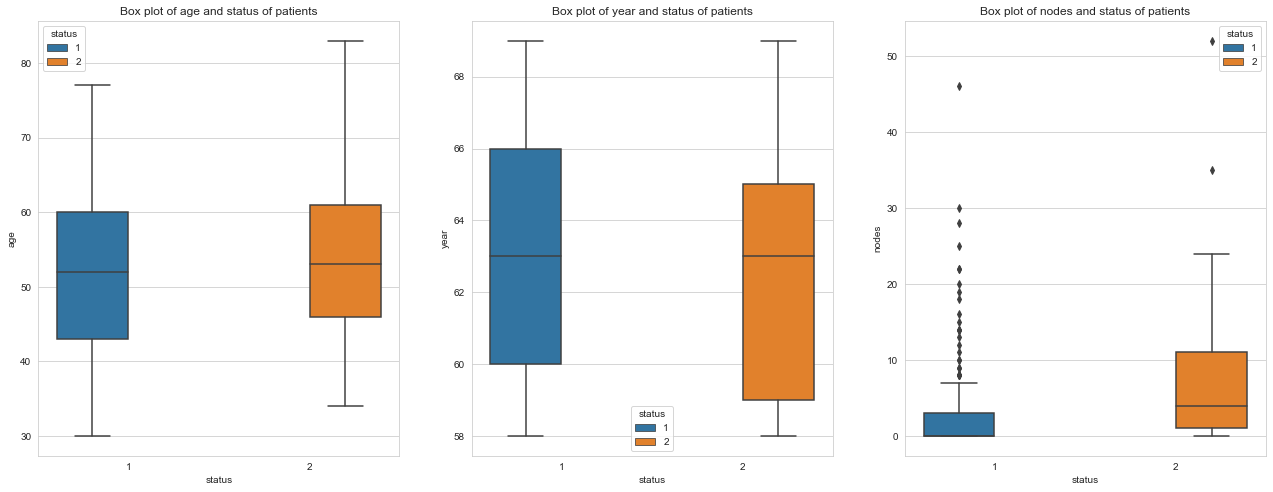

In [18]:
#Box Plots
sns.set_style("whitegrid")


    
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
for idx, val in enumerate(list(haberman_df.columns)[:-1]):
    bp = sns.boxplot( x='status', y=val,data=haberman_df,hue='status', ax=axes[idx]).set_title("Box plot of {} and status of patients".format(val))


plt.show()  


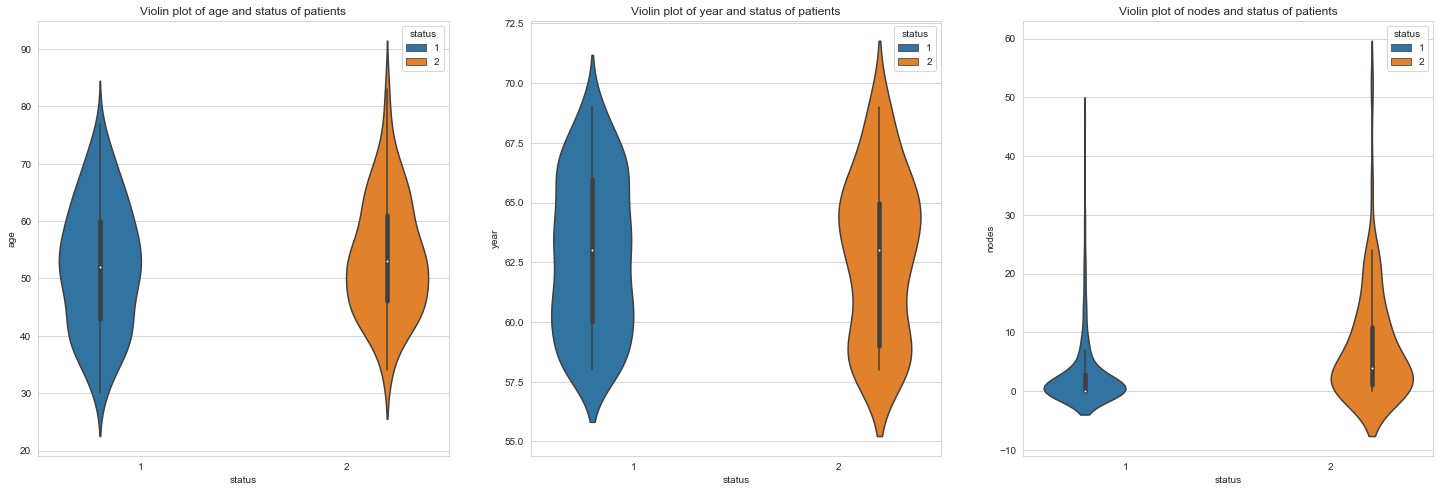

In [19]:
#Violin PLot

fig, axes = plt.subplots(1, 3, figsize=(25, 8))
for idx, val in enumerate(list(haberman_df.columns)[:-1]):
        sns.violinplot( x='status', y=val, hue='status',data=haberman_df, ax=axes[idx]).set_title("Violin plot of {} and status of patients".format(val))

#### Observation of Box  and Violin Plots:

* Age of the patient:It is observed that most of the patients whose age was between 30 and 35 years, survived for more than five years and patients whose age was above 75 years, survived for less than five years.
* Year of operation of patients: it is observed that most of the patients whose operation was done before year 60, survived for less than five years and most of the patients whose operation was done after year 65, survived for more than five years.

* Number of axillary lymph nodes: It is obseved that only 25% of patients who had axillary lymph nodes more than 3, survived for more than five years.The higher the number of axillary lymph nodes,more is the chances of patients surviving less than five years.

#### Observation of Univariate Analysys:


* Since overlapping is observed over the data, it is difficult to get a clear picture
* we can observe that nodes of the survivors in densed to 0 to 
* Nearly 80% of the patents are having less than 5 nodes

#### Multivariate Analysys:


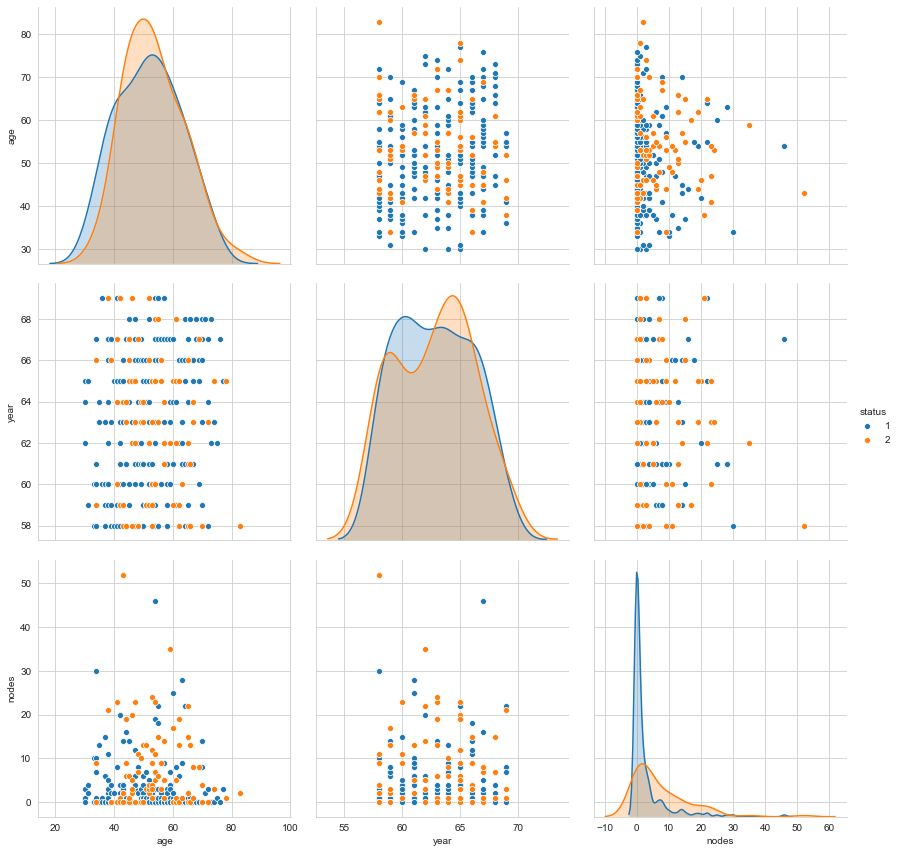

In [20]:
sns.pairplot(haberman_df, hue='status', height=4,vars=['age','year','nodes'])
plt.show()

#### Observation of Multivariate Analysys:


* By scattering the data points between year and nodes, we can come to a conclusion that the seperation is better between them as compared to other classes



#### Conclusion:

*  Given Dataset is not balanced
*  Seperation of the data is not linear, most of the data points are overrlapped. So it is difficult to come to a conclusion
*  Only Node is giving some useful information of the dataset.
